**Task: Import all needed libraries and modules: cv2, matplotlib, numpy**

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

**Use the following function display_img()  that takes as input an image and plot it in the notebook.**
Dont forget to run the cell in order to define the function

In [ ]:
def display_img(img,cmap=None):
    fig = plt.figure(figsize=(6,5))
    ax = fig.add_subplot(111)
    ax.imshow(img,cmap)

**TASK: Read and display the giaraffes.jpg image. Dont forget to correct the color distribution**

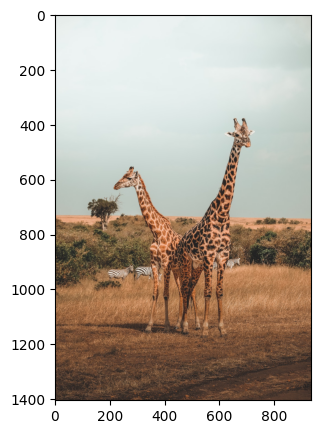

In [ ]:
img = cv2.imread('giraffes.jpg')
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
display_img(img)

**TASK: flip the original image along central x axis and plot the resulting image flipped_img**

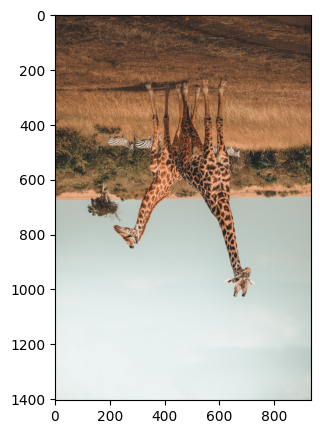

In [ ]:
flipped_img = cv2.flip(img,0)
display_img(flipped_img)

**TASK: Display the red component of the original image by putting the other components to zero. Plot it using plt function**

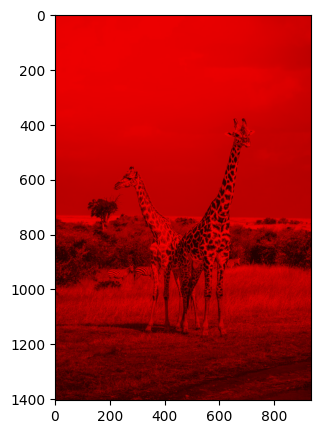

In [ ]:
red_component = img.copy()
red_component = np.zeros_like(img)
red_component[:, :, 0] = img[:, :, 0]
display_img(red_component)


**TASK: Apply a binary threshold onto the image using threshold function. You have to modify cmap parameter to show the image in grayscale**

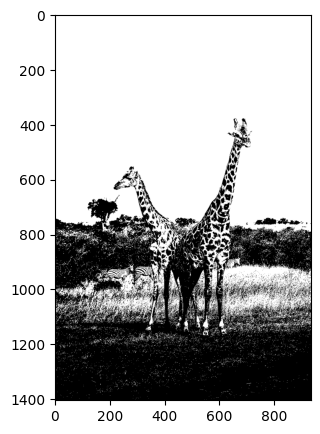

In [ ]:
img_gray = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
ret,thresh = cv2.threshold(img_gray,127,255,cv2.THRESH_BINARY)
display_img(thresh,cmap='gray')

**TASK: Create a mean filter with a 4 by 4 Kernel.
Read the original giraffes again and correct the color distribution.
and then use 2-D Convolution to blur the giraffer image (displayed in normal RGB) using filter2D function**

In [ ]:
# create the kernel
kernel = np.ones((4,4),np.float32)/16

In [ ]:
kernel

array([[0.0625, 0.0625, 0.0625, 0.0625],
       [0.0625, 0.0625, 0.0625, 0.0625],
       [0.0625, 0.0625, 0.0625, 0.0625],
       [0.0625, 0.0625, 0.0625, 0.0625]], dtype=float32)

In [ ]:
# read the image and correct the color distribution
img = cv2.imread('giraffes.jpg')
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

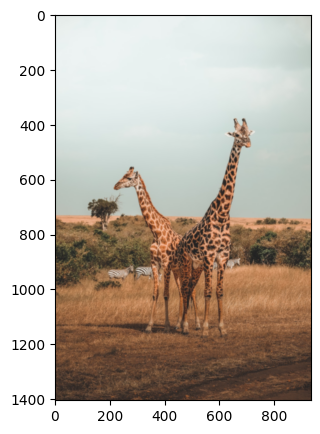

In [ ]:
# display the blurred image
img_blur = cv2.filter2D(img,-1,kernel)
display_img(img_blur)

**TASK: using a 3x3 point detection kernel [[-1,-1,-1],[-1,8,-1],[-1,-1,-1]], apply filter2D function to detect all edeges within the original image**

In [ ]:
# point detection kernel
kernel = np.array([[-1,-1,-1],[-1,8,-1],[-1,-1,-1]])

**TASK: Create a Horizontal Sobel Filter (sobelx) with a kernel size of 5 to the grayscale version of the giaraffes image and then display the resulting gradient filtered version of the image.**

In [ ]:
# read the image again
img = cv2.imread('giraffes.jpg')
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
img_gray = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)

In [ ]:
# apply sobelx
img_sobelx = cv2.Sobel(img_gray,cv2.CV_64F,1,0,ksize=5)

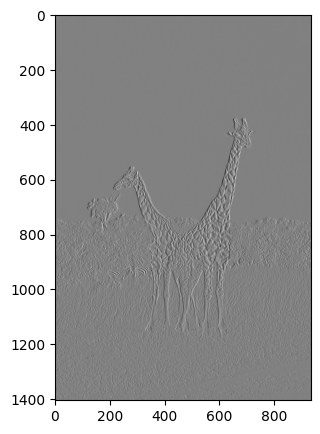

In [ ]:
# display image
display_img(img_sobelx,cmap='gray')

**TASK: Create a Horizontal Sobel Filter (sobely) with a kernel size of 5 to the grayscale version of the giaraffes image and then display the resulting gradient filtered version of the image.**

In [ ]:
# read the image again
img = cv2.imread('giraffes.jpg')
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
img_gray = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)

In [ ]:
# apply sobely
img_sobely = cv2.Sobel(img_gray,cv2.CV_64F,0,1,ksize=5)

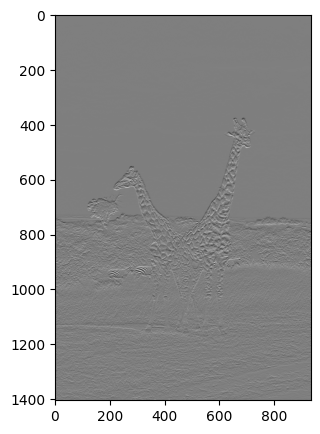

In [ ]:
# display image
display_img(img_sobely,cmap='gray')

**TASK: Using addWeighted function, conbine sobelx and sobley together and plot the resulting image**

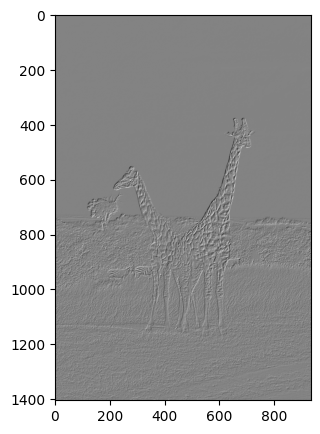

In [ ]:
# Combine the results
added = cv2.addWeighted(img_sobelx,0.5,img_sobely,0.5,0)
display_img(added,cmap='gray')

**TASK: Upload the J image and apply the following operations**

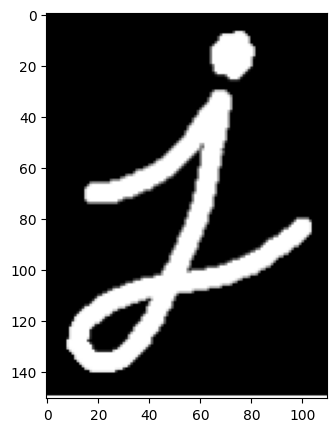

In [ ]:
# read the j image and plot it
img = cv2.imread('j.PNG')
display_img(img)

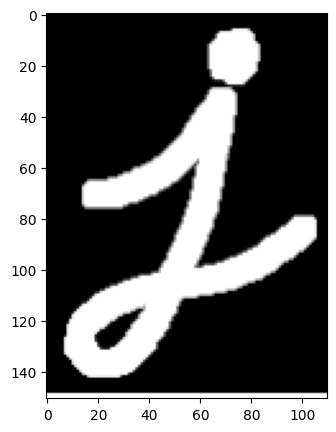

In [ ]:
# create a 4 by 4 kernel and apply the dialation operation in order to increase the object area
kernel = np.ones((4,4),np.uint8)
img_dial = cv2.dilate(img,kernel,iterations=1)
display_img(img_dial)

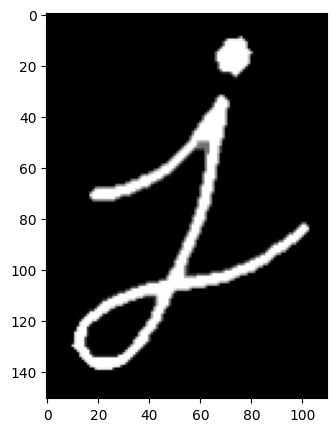

In [ ]:
# create a 4 by 4 kernel and apply the dialation operation in order to increase the object area
kernel = np.ones((4,4),np.uint8)
img_erode = cv2.erode(img,kernel,iterations=1)
display_img(img_erode)

**TASK: Upload the jinner image and apply the following operations**

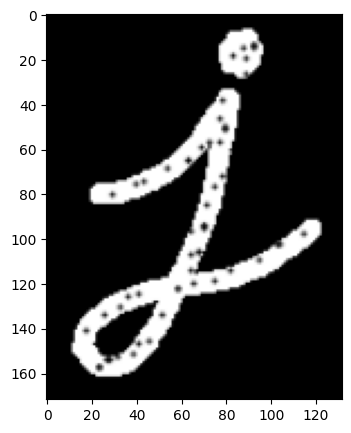

In [ ]:
# read the jinner image ans plot it
img = cv2.imread('jinner.PNG')
display_img(img)

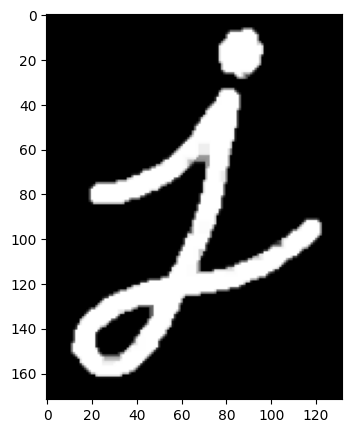

In [ ]:
# create a 5 by 5 kernel and apply the close operation in order to remove all black points
kernel  = np.ones((5,5),np.uint8)
img_close = cv2.morphologyEx(img,cv2.MORPH_CLOSE,kernel)
display_img(img_close)

**TASK: Upload the world map image and apply the following operations**

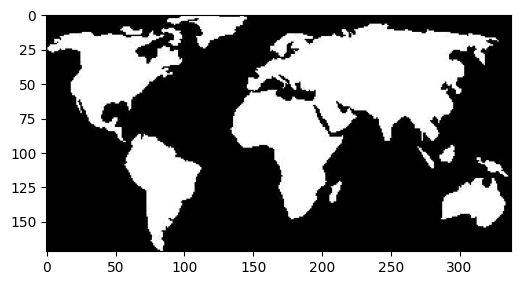

In [ ]:
# read the world_image image and plot it
img = cv2.imread('world_image.png')
display_img(img)

### Inner boundary extraction

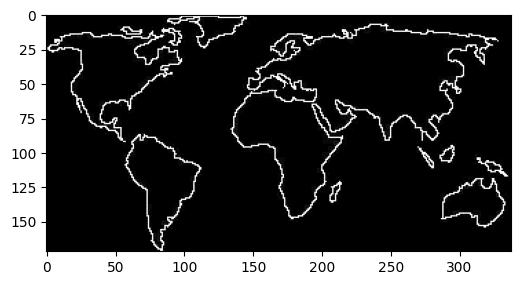

In [ ]:
# Use morphological operation with a 3x3 kernel (remember: the Inner boundary is the result of a substraction)
kernel = np.ones((3,3), np.uint8)
img_eroded = cv2.erode(img, kernel, iterations=1)
img_inner = img - img_eroded
display_img(img_inner)

### Outer boundary extraction

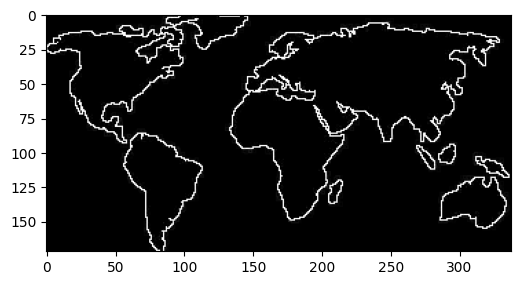

In [ ]:
# Use morphological operation with a 3x3 kernel (remember: the Outer boundary is the result of a substraction)

kernel = np.ones((3,3), np.uint8)
img_dilated = cv2.dilate(img, kernel, iterations=1)
img_outer = img_dilated - img
display_img(img_outer)

### Drawing on the original world_image

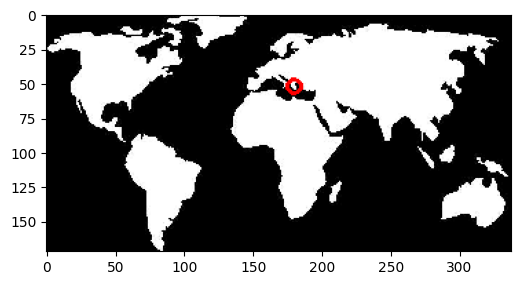

In [ ]:
# Try to draw a circle arround the Azerbaijan country
img= cv2.imread('world_image.png')
x, y = 180, 52  # Approximate coordinates
# Define the radius of the circle
radius = 5
# Draw the circle on the map
cv2.circle(img, (x, y), radius, (255, 0, 0), 2)
# Display the image
display_img(img)



# **No Azerbaijan in the given map((**

# Good luck!